<a href="https://colab.research.google.com/github/FatimaZahraBoujrad/phishing_classification/blob/main/html_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phishing Website Detection using HTML Features and Machine Learning/Deep Learning

This notebook focuses on detecting phishing websites by analyzing their HTML features. It leverages both traditional Machine Learning algorithms (Logistic Regression, Random Forest, Gradient Boosting, SVM) and Deep Learning models (Multilayer Perceptron, Autoencoder) to classify websites as benign or phishing based on various extracted characteristics.

In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
import pandas as pd

# Replace 'my_data.csv' with the actual path to your file in Google Drive
# For example: '/content/drive/MyDrive/my_folder/my_data.csv'
benign = pd.read_csv('/content/drive/MyDrive/Projet_Phishing/Dataset/bening_html_features.csv')
phishing= pd.read_csv('/content/drive/MyDrive/Projet_Phishing/Dataset/phishing_html_features.csv')



In [52]:
benign.head()

,num_forms,num_password_inputs,external_form_action,empty_form_action,mailto_form_action,num_links,external_link_ratio,empty_link_ratio,ip_link_count,num_resources,...,input_count,hidden_fields_count,has_sensitive_fields,has_marquee,has_hidden_redirect,image_count,external_images_count,cdn_images_count,brand_impersonation,facebook_cookie_harvesting
0,0,0,0,0,0,129,0.085271,0.193798,0,51,...,0,0,0,0,0,4,2,1,1,1
1,0,0,0,0,0,98,0.428571,0.000000,0,41,...,0,0,0,0,0,5,0,0,1,1
2,0,0,0,0,0,0,0.000000,0.000000,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,2,0,127,0.086614,0.000000,0,106,...,10,6,0,0,0,0,0,0,1,1
4,3,0,0,0,0,86,0.000000,0.023256,0,83,...,3,0,0,0,0,9,0,0,1,1


The features used in this notebook are the columns present in your `df` DataFrame (after concatenating the benign and phishing datasets and dropping `mailto_form_action`). These include:

*   `num_forms`: Number of forms on the page.
*   `num_password_inputs`: Number of password input fields.
*   `external_form_action`: Indicates if form actions point to external domains.
*   `empty_form_action`: Indicates if form actions are empty.
*   `num_links`: Total number of links.
*   `external_link_ratio`: Ratio of external links.
*   `empty_link_ratio`: Ratio of empty links.
*   `ip_link_count`: Number of links containing IP addresses.
*   `num_resources`: Total number of external resources (scripts, images, etc.).
*   `external_resource_ratio`: Ratio of external resources.
*   `uses_eval`: Presence of 'eval' in JavaScript.
*   `uses_document_write`: Presence of 'document.write' in JavaScript.
*   `uses_settimeout`: Presence of 'setTimeout' in JavaScript.
*   `uses_setinterval`: Presence of 'setInterval' in JavaScript.
*   `uses_window_location`: Presence of 'window.location' manipulation.
*   `uses_onmouseover`: Presence of 'onmouseover' event handlers.
*   `num_scripts`: Number of scripts.
*   `num_iframes`: Number of iframes.
*   `hidden_iframes`: Number of hidden iframes.
*   `html_length`: Length of the HTML content.
*   `num_tags`: Total number of HTML tags.
*   `phishing_keyword_count`: Count of phishing-related keywords.
*   `urgency_word_count`: Count of urgency-related words.
*   `avg_js_entropy`: Average entropy of JavaScript sections.
*   `max_js_entropy`: Maximum entropy of JavaScript sections.
*   `obfuscated_js_count`: Count of potentially obfuscated JavaScripts.
*   `input_count`: Number of input fields.
*   `hidden_fields_count`: Number of hidden input fields.
*   `has_sensitive_fields`: Indicates presence of sensitive input fields (e.g., credit card).
*   `has_marquee`: Presence of `<marquee>` tag.
*   `has_hidden_redirect`: Indicates hidden redirection attempts.
*   `image_count`: Number of images.
*   `external_images_count`: Number of external images.
*   `cdn_images_count`: Number of images from CDNs.
*   `brand_impersonation`: Indicates potential brand impersonation.
*   `facebook_cookie_harvesting`: Indicates Facebook cookie harvesting attempts.

In [53]:
benign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   num_forms                   20000 non-null  int64  
 1   num_password_inputs         20000 non-null  int64  
 2   external_form_action        20000 non-null  int64  
 3   empty_form_action           20000 non-null  int64  
 4   mailto_form_action          20000 non-null  int64  
 5   num_links                   20000 non-null  int64  
 6   external_link_ratio         20000 non-null  float64
 7   empty_link_ratio            20000 non-null  float64
 8   ip_link_count               20000 non-null  int64  
 9   num_resources               20000 non-null  int64  
 10  external_resource_ratio     20000 non-null  float64
 11  uses_eval                   20000 non-null  int64  
 12  uses_document_write         20000 non-null  int64  
 13  uses_settimeout             200

In [54]:

phishing['label'] = 1
benign['label'] = 0

# Concaténation
df = pd.concat([phishing, benign], axis=0, ignore_index=True)

# Shuffle
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

df.shape


(40000, 38)

In [55]:
df['label'].value_counts(normalize=True)


,proportion
label,
0,0.5
1,0.5


In [56]:
df.isnull().sum().sort_values(ascending=False)


,0
num_forms,0
num_password_inputs,0
external_form_action,0
empty_form_action,0
mailto_form_action,0
num_links,0
external_link_ratio,0
empty_link_ratio,0
ip_link_count,0
num_resources,0


In [57]:
features_to_check = [
    'num_forms', 'external_link_ratio', 'phishing_keyword_count',
    'urgency_word_count', 'hidden_iframes'
]

df.groupby('label')[features_to_check].mean()


,num_forms,external_link_ratio,phishing_keyword_count,urgency_word_count,hidden_iframes
label,,,,,
0,1.29000,0.112071,7.02760,0.13935,0.5557
1,1.72635,0.345787,3.97275,0.08670,0.1558


In [58]:
corr = df.corr()


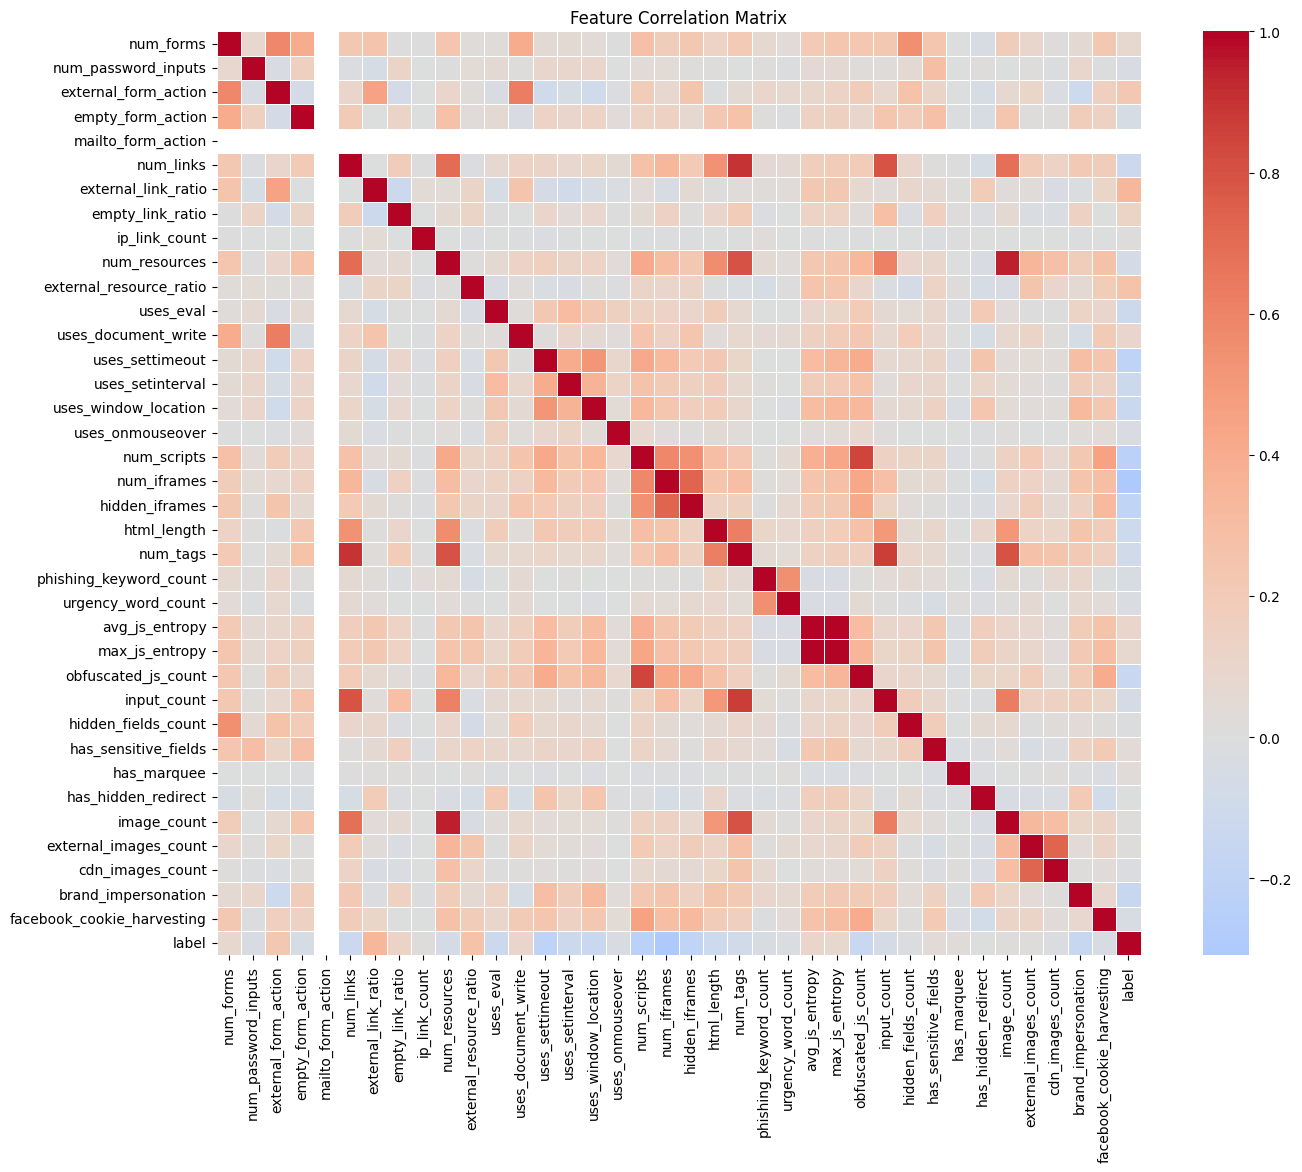

In [59]:
plt.figure(figsize=(16, 12))
sns.heatmap(
    corr,
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5
)
plt.title("Feature Correlation Matrix")
plt.show()


In [60]:
corr_target = corr['label'].sort_values(ascending=False)

corr_target


,label
label,1.000000
external_link_ratio,0.341999
external_resource_ratio,0.263120
external_form_action,0.218158
empty_link_ratio,0.124464
uses_document_write,0.103861
avg_js_entropy,0.096324
num_forms,0.073907
max_js_entropy,0.072903
has_sensitive_fields,0.037682


In [61]:
corr_target[abs(corr_target) > 0.2]


,label
label,1.000000
external_link_ratio,0.341999
external_resource_ratio,0.263120
external_form_action,0.218158
uses_settimeout,-0.202466
num_scripts,-0.230284
num_iframes,-0.309342


Focusing on the EDA results, particularly the correlation analysis, we identified features that strongly correlate with the `label` (indicating whether a website is phishing or benign):

**Features with Strongest Positive Correlation (tend to be higher in phishing sites):**
*   `external_link_ratio`: A higher ratio of external links is more indicative of a phishing site.
*   `external_resource_ratio`: Similarly, a higher ratio of external resources points towards phishing.
*   `external_form_action`: Forms submitting to external domains are a strong indicator of phishing.

**Features with Strongest Negative Correlation (tend to be lower in phishing sites / higher in benign sites):**
*   `num_iframes`: Benign sites tend to have more iframes than phishing sites.
*   `num_scripts`: Fewer scripts are generally found on phishing sites compared to benign ones.
*   `uses_settimeout`: Less usage of `setTimeout` is observed in phishing websites.
*   `hidden_iframes`: Benign sites tend to have more hidden iframes.

These correlations highlight crucial characteristics that differentiate phishing from benign websites, making them valuable for our detection models.

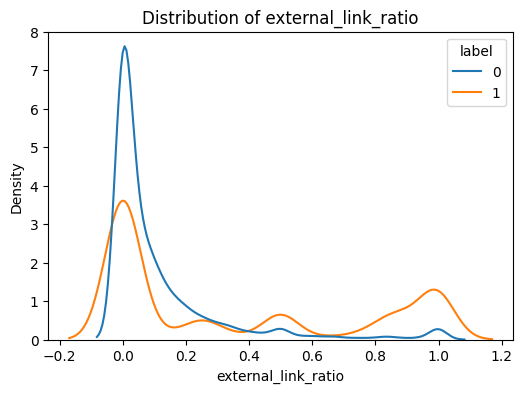

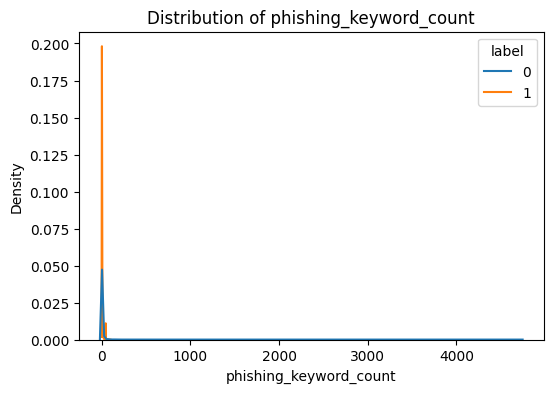

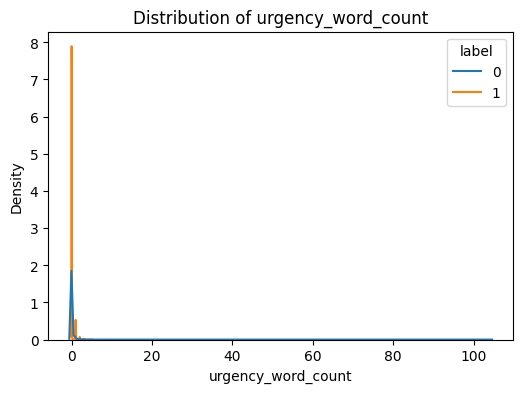

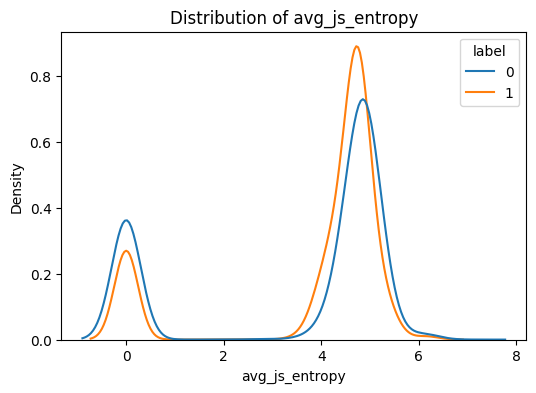

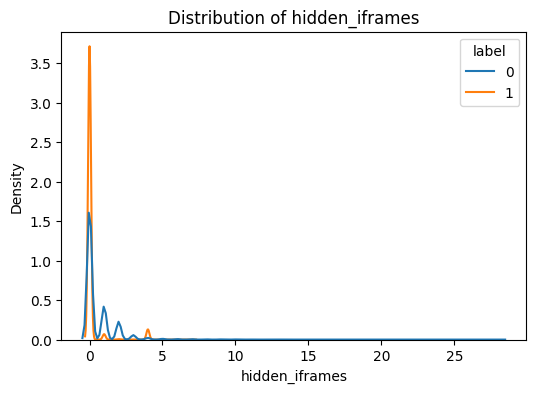

In [76]:
key_features = [
    'external_link_ratio',
    'phishing_keyword_count',
    'urgency_word_count',
    'avg_js_entropy',
    'hidden_iframes'
]

for feature in key_features:
    plt.figure(figsize=(6,4))
    sns.kdeplot(data=df, x=feature, hue='label', common_norm=False)
    plt.title(f'Distribution of {feature}')
    plt.show()


In [78]:
df.drop(columns=['mailto_form_action'], inplace=True)

KeyError: "['mailto_form_action'] not found in axis"

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   num_forms                   40000 non-null  int64  
 1   num_password_inputs         40000 non-null  int64  
 2   external_form_action        40000 non-null  int64  
 3   empty_form_action           40000 non-null  int64  
 4   num_links                   40000 non-null  int64  
 5   external_link_ratio         40000 non-null  float64
 6   empty_link_ratio            40000 non-null  float64
 7   ip_link_count               40000 non-null  int64  
 8   num_resources               40000 non-null  int64  
 9   external_resource_ratio     40000 non-null  float64
 10  uses_eval                   40000 non-null  int64  
 11  uses_document_write         40000 non-null  int64  
 12  uses_settimeout             40000 non-null  int64  
 13  uses_setinterval            400

In [65]:
df.describe()

,num_forms,num_password_inputs,external_form_action,empty_form_action,num_links,external_link_ratio,empty_link_ratio,ip_link_count,num_resources,external_resource_ratio,...,hidden_fields_count,has_sensitive_fields,has_marquee,has_hidden_redirect,image_count,external_images_count,cdn_images_count,brand_impersonation,facebook_cookie_harvesting,label
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,...,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.00000,40000.000000
mean,1.508175,0.170675,0.475750,0.427675,97.053000,0.228929,0.083751,0.004625,52.684050,0.262564,...,2.594400,0.273650,0.003875,0.041550,23.842050,5.921300,3.150425,0.292350,0.17965,0.500000
std,2.952076,0.930385,1.924774,1.230877,260.584442,0.341696,0.225756,0.183179,102.055071,0.274858,...,10.655582,0.445837,0.062130,0.199561,90.932892,28.128713,25.263303,0.454848,0.38390,0.500006
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,7.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,13.000000,0.029586,0.000000,0.000000,33.000000,0.161765,...,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.00000,0.500000
75%,2.000000,0.000000,0.000000,1.000000,101.000000,0.333333,0.020000,0.000000,67.000000,0.467585,...,2.000000,1.000000,0.000000,0.000000,26.000000,2.000000,0.000000,1.000000,0.00000,1.000000
max,242.000000,90.000000,10.000000,73.000000,5338.000000,1.000000,1.000000,17.000000,2697.000000,1.000000,...,626.000000,1.000000,1.000000,1.000000,2359.000000,2355.000000,2221.000000,1.000000,1.00000,1.000000


## Modeling

### Split dataset

In [66]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='label')
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


## Feature scaling

In [67]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Training

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]

print(classification_report(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr))


              precision    recall  f1-score   support

           0       0.82      0.84      0.83      4000
           1       0.83      0.82      0.83      4000

    accuracy                           0.83      8000
   macro avg       0.83      0.83      0.83      8000
weighted avg       0.83      0.83      0.83      8000

ROC-AUC: 0.900819375


In [69]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))


              precision    recall  f1-score   support

           0       0.97      0.98      0.98      4000
           1       0.98      0.97      0.98      4000

    accuracy                           0.98      8000
   macro avg       0.98      0.98      0.98      8000
weighted avg       0.98      0.98      0.98      8000

ROC-AUC: 0.9968915


In [70]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)
y_prob_gb = gb.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred_gb))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_gb))


              precision    recall  f1-score   support

           0       0.95      0.92      0.93      4000
           1       0.92      0.95      0.94      4000

    accuracy                           0.93      8000
   macro avg       0.93      0.93      0.93      8000
weighted avg       0.93      0.93      0.93      8000

ROC-AUC: 0.9834673125


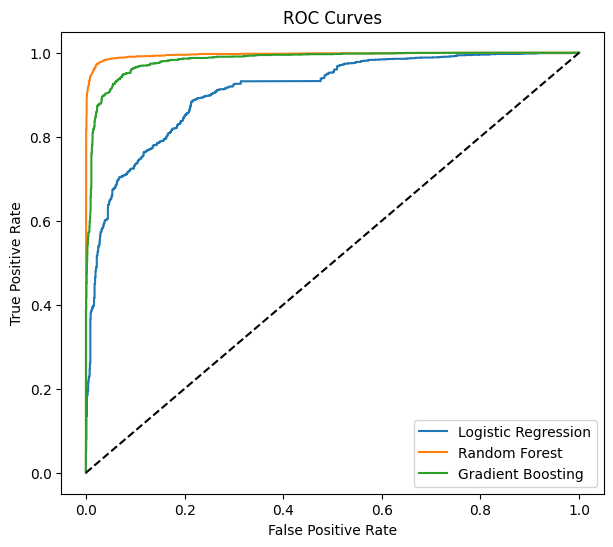

In [25]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

models = {
    "Logistic Regression": y_prob_lr,
    "Random Forest": y_prob_rf,
    "Gradient Boosting": y_prob_gb
}

plt.figure(figsize=(7,6))

for name, probs in models.items():
    fpr, tpr, _ = roc_curve(y_test, probs)
    plt.plot(fpr, tpr, label=name)

plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()


In [71]:
import pandas as pd

rf_importance = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

rf_importance.head(10)


,0
external_link_ratio,0.104467
num_scripts,0.096291
num_tags,0.093114
html_length,0.086689
num_links,0.064426
num_resources,0.063999
num_iframes,0.060009
max_js_entropy,0.052881
avg_js_entropy,0.049275
external_resource_ratio,0.045827


In [72]:
#Logistic regression coefficients
lr_coef = pd.Series(
    lr.coef_[0],
    index=X.columns
).sort_values(key=abs, ascending=False)

lr_coef.head(10)


,0
external_form_action,2.124928
image_count,1.747471
phishing_keyword_count,-1.516219
hidden_iframes,-1.364597
num_iframes,-1.198131
num_scripts,-1.100554
num_links,-1.018111
external_resource_ratio,0.779774
avg_js_entropy,0.775783
obfuscated_js_count,0.696079


In [73]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "Gradient Boosting"],
    "ROC-AUC": [
        roc_auc_score(y_test, y_prob_lr),
        roc_auc_score(y_test, y_prob_rf),
        roc_auc_score(y_test, y_prob_gb)
    ]
})

results


,Model,ROC-AUC
0,Logistic Regression,0.900819
1,Random Forest,0.996892
2,Gradient Boosting,0.983467


In [74]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, classification_report

xgb = XGBClassifier(
    n_estimators=400,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='auc',
    random_state=42
)

xgb.fit(X_train, y_train)

y_prob_xgb = xgb.predict_proba(X_test)[:,1]

print("ROC-AUC:", roc_auc_score(y_test, y_prob_xgb))
print(classification_report(y_test, (y_prob_xgb > 0.5).astype(int)))


ROC-AUC: 0.9955515312500001
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      4000
           1       0.97      0.98      0.97      4000

    accuracy                           0.97      8000
   macro avg       0.97      0.97      0.97      8000
weighted avg       0.97      0.97      0.97      8000



In [75]:
from sklearn.svm import SVC

svm = SVC(
    kernel='rbf',
    C=10,
    gamma='scale',
    probability=True,
    random_state=42
)

svm.fit(X_train_scaled, y_train)

y_prob_svm = svm.predict_proba(X_test_scaled)[:,1]

print("ROC-AUC:", roc_auc_score(y_test, y_prob_svm))


ROC-AUC: 0.9765951874999999


## Deep learning for html based classification
In this section, we will use DL algorithms like MLP and Autoencoders
1. MLP





*   Learns non-linear feature interactions
*   Strong baseline for tabular phishing features



2. Autoencoder

 Learns compact latent representations

 Useful for:

* Dimensionality reduction

* Noise removal

* Anomaly-aware representations

In [79]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop(columns='label').values
y = df['label'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [80]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [81]:
mlp = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

mlp.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [82]:
early_stop = EarlyStopping(
    monitor='val_auc',
    mode='max',
    patience=10,
    restore_best_weights=True
)

history = mlp.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7762 - auc: 0.8501 - loss: 0.4769 - val_accuracy: 0.8844 - val_auc: 0.9473 - val_loss: 0.2927
Epoch 2/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8710 - auc: 0.9332 - loss: 0.3311 - val_accuracy: 0.8975 - val_auc: 0.9582 - val_loss: 0.2620
Epoch 3/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8833 - auc: 0.9441 - loss: 0.3016 - val_accuracy: 0.9042 - val_auc: 0.9638 - val_loss: 0.2488
Epoch 4/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8907 - auc: 0.9494 - loss: 0.2862 - val_accuracy: 0.9097 - val_auc: 0.9676 - val_loss: 0.2344
Epoch 5/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8942 - auc: 0.9531 - loss: 0.2726 - val_accuracy: 0.9123 - val_auc: 0.9702 - val_loss: 0.2254
Epoch 6/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9022 - auc: 0.9584 - loss: 0.2572 - val_accuracy: 0.9162 - val_auc: 0.9719 - val_loss: 0.2230
Epoch 7/100
400/400 ━━━━━━━━━━━━━━

In [83]:
mlp.evaluate(X_test, y_test, verbose=0)


[0.14251135289669037, 0.9459999799728394, 0.9862425923347473]

In [84]:
y_prob_mlp = mlp.predict(X_test).ravel()

from sklearn.metrics import roc_auc_score, classification_report

print("ROC-AUC:", roc_auc_score(y_test, y_prob_mlp))
print(classification_report(y_test, (y_prob_mlp > 0.5).astype(int)))


250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
ROC-AUC: 0.9870753125
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      4000
           1       0.95      0.94      0.95      4000

    accuracy                           0.95      8000
   macro avg       0.95      0.95      0.95      8000
weighted avg       0.95      0.95      0.95      8000



## Autoencoders

In [85]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input


In [86]:
input_dim = X_train.shape[1]
latent_dim = 16  # paper-friendly

input_layer = Input(shape=(input_dim,))

encoded = Dense(64, activation='relu')(input_layer)
encoded = Dense(32, activation='relu')(encoded)
latent = Dense(latent_dim, activation='relu', name='latent')(encoded)

decoded = Dense(32, activation='relu')(latent)
decoded = Dense(64, activation='relu')(decoded)
output_layer = Dense(input_dim, activation='linear')(decoded)

autoencoder = Model(input_layer, output_layer)
encoder = Model(input_layer, latent)

autoencoder.compile(
    optimizer='adam',
    loss='mse'
)


In [87]:
autoencoder.fit(
    X_train, X_train,
    validation_split=0.2,
    epochs=100,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.5974 - val_loss: 0.4036
Epoch 2/100


/usr/local/lib/python3.12/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_auc` which is not available. Available metrics are: loss,val_loss
  current = self.get_monitor_value(logs)


400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2355 - val_loss: 0.3400
Epoch 3/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2177 - val_loss: 0.2393
Epoch 4/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1601 - val_loss: 0.1945
Epoch 5/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1229 - val_loss: 0.1599
Epoch 6/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1018 - val_loss: 0.1545
Epoch 7/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0931 - val_loss: 0.1263
Epoch 8/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0871 - val_loss: 0.1283
Epoch 9/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0928 - val_loss: 0.1207
Epoch 10/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0857 - val_loss: 0.0958
Epoch 11/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0687 - val_loss: 0.0930
Epoch 12/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0702 - val_loss: 0.0950
Epoch 13/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/ste

In [88]:
X_train_latent = encoder.predict(X_train)
X_test_latent = encoder.predict(X_test)


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [89]:
latent_mlp = Sequential([
    Dense(32, activation='relu', input_shape=(latent_dim,)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

latent_mlp.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [90]:
latent_mlp.fit(
    X_train_latent, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5600 - auc: 0.5782 - loss: 0.8480 - val_accuracy: 0.7937 - val_auc: 0.8652 - val_loss: 0.5179
Epoch 2/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7445 - auc: 0.8198 - loss: 0.5441 - val_accuracy: 0.8253 - val_auc: 0.9058 - val_loss: 0.4594
Epoch 3/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7858 - auc: 0.8615 - loss: 0.4923 - val_accuracy: 0.8356 - val_auc: 0.9108 - val_loss: 0.4215
Epoch 4/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8061 - auc: 0.8807 - loss: 0.4614 - val_accuracy: 0.8452 - val_auc: 0.9226 - val_loss: 0.4018
Epoch 5/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8187 - auc: 0.8929 - loss: 0.4360 - val_accuracy: 0.8534 - val_auc: 0.9256 - val_loss: 0.3798
Epoch 6/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8271 - auc: 0.9013 - loss: 0.4140 - val_accuracy: 0.8556 - val_auc: 0.9273 - val_loss: 0.3690
Epoch 7/100
400/400 ━━━━━━━━━━━━━━

In [91]:
y_prob_latent = latent_mlp.predict(X_test_latent).ravel()

print("ROC-AUC:", roc_auc_score(y_test, y_prob_latent))
print(classification_report(y_test, (y_prob_latent > 0.5).astype(int)))


250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
ROC-AUC: 0.9560394375000001
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      4000
           1       0.92      0.88      0.90      4000

    accuracy                           0.90      8000
   macro avg       0.90      0.90      0.90      8000
weighted avg       0.90      0.90      0.90      8000

